## Mineração de dados - Prova - Questão 8


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (15,10)

Importando a biblioteca apyori e os dados

In [2]:
!pip -qq install apyori
import apyori

In [5]:
url = '/content/drive/MyDrive/Colab Notebooks/Univesp/MD/transacoes.csv'
transacoes = pd.read_csv(url)
transacoes.head(10)

,liquidificador,maq_lavar,geladeira,batedeira,fogão,microondas,aspirador,processador,forno,maq_secar
0,liquidificador,maq_lavar,geladeira,batedeira,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,maq_lavar,NaN,NaN,fogão,microondas,aspirador,NaN,NaN,NaN
2,liquidificador,NaN,geladeira,NaN,fogão,microondas,NaN,processador,NaN,NaN
3,NaN,NaN,geladeira,NaN,fogão,NaN,NaN,NaN,forno,NaN
4,liquidificador,NaN,NaN,batedeira,fogão,microondas,aspirador,NaN,forno,NaN
5,liquidificador,maq_lavar,NaN,batedeira,fogão,microondas,NaN,NaN,NaN,maq_secar


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#inverter ordem das colunas (caso queira inverter para variar)
transacoes = transacoes.iloc[:, ::-1]

In [ ]:
#inverter ordem das linhas (caso queira inverter para variar)
transacoes = transacoes.iloc[::-1].reset_index(drop=True)

In [ ]:
transacoes.head(10)

,liquidificador,maq_lavar,geladeira,batedeira,fogão,microondas,aspirador,processador,forno,maq_secar
0,liquidificador,maq_lavar,NaN,batedeira,fogão,microondas,NaN,NaN,NaN,maq_secar
1,liquidificador,NaN,NaN,batedeira,fogão,microondas,aspirador,NaN,forno,NaN
2,NaN,NaN,geladeira,NaN,fogão,NaN,NaN,NaN,forno,NaN
3,liquidificador,NaN,geladeira,NaN,fogão,microondas,NaN,processador,NaN,NaN
4,NaN,maq_lavar,NaN,NaN,fogão,microondas,aspirador,NaN,NaN,NaN
5,liquidificador,maq_lavar,geladeira,batedeira,NaN,NaN,NaN,NaN,NaN,NaN


#### Tamanho da base de dados

In [ ]:
len(transacoes)

6

#### Análise exploratória inicial

In [ ]:
itens = transacoes.melt()['value'].dropna().sort_values()
print(f'Existem {itens.nunique()} produtos distintos:\n', itens.unique())

Existem 10 produtos distintos:
 ['aspirador' 'batedeira' 'fogão' 'forno' 'geladeira' 'liquidificador'
 'maq_lavar' 'maq_secar' 'microondas' 'processador']


#### Itens mais vendidos

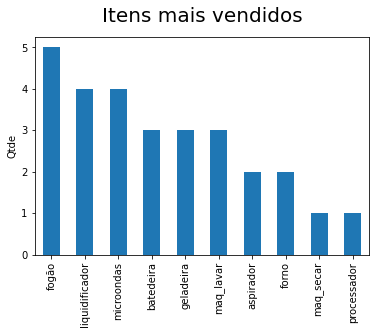

In [ ]:
qtde_itens = itens.value_counts()

ax = qtde_itens.nlargest(10).plot(kind="bar")
ax.set_title("Itens mais vendidos", size=20, weight=500, pad=15)
ax.set_ylabel("Qtde")
plt.show()

#### Itens menos vendidos

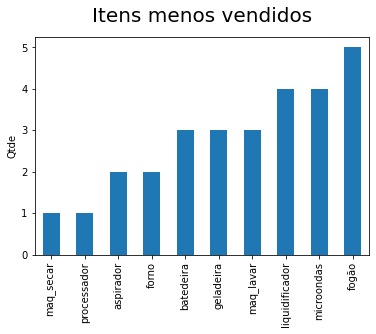

In [ ]:
ax = qtde_itens.nsmallest(10).plot(kind="bar")
ax.set_title("Itens menos vendidos", size=20, weight=500, pad=15)
ax.set_ylabel("Qtde")
plt.show()

#### Pré-processamento 
##### Contando os itens de cada transação

In [ ]:
#conta a qtde de itens não nulos em cada objeto
qtde_por_cesta = transacoes.notna().apply(sum, axis=1)

#### No Apriori é necessário haver ao menos 2 itens em cada transação, então eliminamos transações com um único produto

In [ ]:
#separando os objetos com mais de um item na transação
cestas = [set(linha.dropna()) for _, linha in transacoes[qtde_por_cesta > 1].iterrows()]
cestas[:6]

[{'batedeira', 'geladeira', 'liquidificador', 'maq_lavar'},
 {'aspirador', 'fogão', 'maq_lavar', 'microondas'},
 {'fogão', 'geladeira', 'liquidificador', 'microondas', 'processador'},
 {'fogão', 'forno', 'geladeira'},
 {'aspirador', 'batedeira', 'fogão', 'forno', 'liquidificador', 'microondas'},
 {'batedeira',
  'fogão',
  'liquidificador',
  'maq_lavar',
  'maq_secar',
  'microondas'}]

In [ ]:
len(cestas)

6

#### Rodando o Apriori

In [ ]:
# MÉTODO ENSINADO NAS AULAS

minsup = 0.51
minconf = 0.79
regras_associacao = apyori.apriori(cestas, min_support=minsup, min_confidence=minconf)

for regra in regras_associacao:
  itens = list(regra.items)
  print(
      f"{itens[:-1]} --> [{itens[-1]}]  Suporte: {regra.support:.3f}"
      f"  Confiança: {regra.ordered_statistics[0].confidence:.3f}"
  )

[] --> [fogão]  Suporte: 0.833  Confiança: 0.833
['microondas'] --> [fogão]  Suporte: 0.667  Confiança: 0.800


In [6]:
# MÉTODO QUE CHEGA A RESPOSTA CORRETA DA PROVA

# importing the required module
from mlxtend.preprocessing import TransactionEncoder


In [7]:
df = transacoes.notna()
df

,liquidificador,maq_lavar,geladeira,batedeira,fogão,microondas,aspirador,processador,forno,maq_secar
0,True,True,True,True,False,False,False,False,False,False
1,False,True,False,False,True,True,True,False,False,False
2,True,False,True,False,True,True,False,True,False,False
3,False,False,True,False,True,False,False,False,True,False
4,True,False,False,True,True,True,True,False,True,False
5,True,True,False,True,True,True,False,False,False,True


In [13]:
# importing the required module
from mlxtend.frequent_patterns import apriori, association_rules

minsup = 0.51
minconf = 0.79

# Extracting the most frequest itemsets via Mlxtend.
# The length column has been added to increase ease of filtering.
frequent_itemsets = apriori(df, min_support=minsup, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# printing the frequent itemset
frequent_itemsets

,support,itemsets,length
0,0.666667,(liquidificador),1
1,0.833333,(fogão),1
2,0.666667,(microondas),1
3,0.666667,"(microondas, fogão)",2


In [14]:
#  We set our metric as "Confidence" to define whether antecedents & consequents are dependent our not
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=minconf)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
0,(microondas),(fogão),0.666667,0.833333,0.666667,1.0,1.2,0.111111,inf,1,1
1,(fogão),(microondas),0.833333,0.666667,0.666667,0.8,1.2,0.111111,1.666667,1,1
